# Uploading Dataset

Getting the dataset.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Dataset2.csv to Dataset2.csv


In [2]:
# importing libraries
import io
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# reading the dataset

df = pd.read_csv(io.BytesIO(uploaded['Dataset2.csv']),encoding='Latin')


For the sake of simplicity, we consider only the target variable and 4 feature variables.

In [4]:
cols = ["TARGET_deathRate", "avgDeathsPerYear", "incidenceRate", "AvgHouseholdSize", "BirthRate"]

data = df[cols].copy()

In [25]:
data

,TARGET_deathRate,avgDeathsPerYear,incidenceRate,AvgHouseholdSize,BirthRate
0,164.9,469,489.800000,2.54,6.118831
1,161.3,70,411.600000,2.34,4.333096
2,174.7,50,349.700000,2.62,3.729488
3,194.8,202,430.400000,2.52,4.603841
4,144.4,26,350.100000,2.34,6.796657
...,...,...,...,...,...
3042,149.6,15,453.549422,2.08,7.773512
3043,150.1,43,453.549422,2.90,8.186470
3044,153.9,46,453.549422,3.04,7.809192
3045,175.0,52,453.549422,2.56,7.582938


In [6]:
data.describe()

,TARGET_deathRate,avgDeathsPerYear,incidenceRate,AvgHouseholdSize,BirthRate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,178.664063,185.965868,448.268586,2.479662,5.640306
std,27.751511,504.134286,54.560733,0.429174,1.985816
min,59.700000,3.000000,201.300000,0.022100,0.000000
25%,161.200000,28.000000,420.300000,2.370000,4.521419
50%,178.100000,61.000000,453.549422,2.500000,5.381478
75%,195.200000,149.000000,480.850000,2.630000,6.493677
max,362.800000,14010.000000,1206.900000,3.970000,21.326165


# Visualising the Distribution

First, we want to observe the distribution of the target variable on 3 parameters - symmetricity, skewness and modality. 

A histogram is used for that purpose.

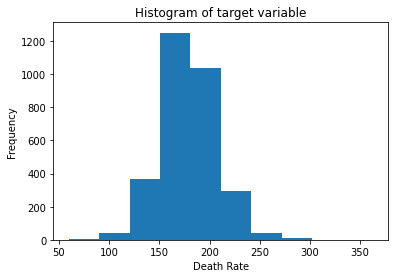

In [7]:
plt.hist(data.TARGET_deathRate)
plt.title("Histogram of target variable")
plt.xlabel("Death Rate")
plt.ylabel("Frequency")
plt.show()

With 10 classes, the distribution of the variable is not really clear. So, the no. of classes is increased.

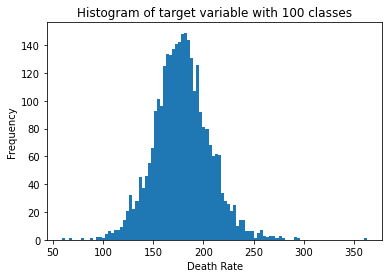

In [8]:
plt.hist(data.TARGET_deathRate, bins=100)
plt.title("Histogram of target variable with 100 classes")
plt.xlabel("Death Rate")
plt.ylabel("Frequency")
plt.show()

From this histogram with 100 classes, it seems that the distribution is normal and there does not seem to be any skewness. There is a single mode in the distribution.


Next, we consider the feature "avgDeathsPerYear". 

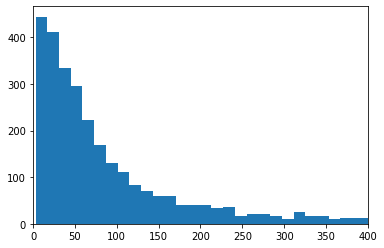

In [9]:
plt.hist(data.avgDeathsPerYear, bins=1000)
plt.xlim(0, 400)
plt.show()

Observation : 

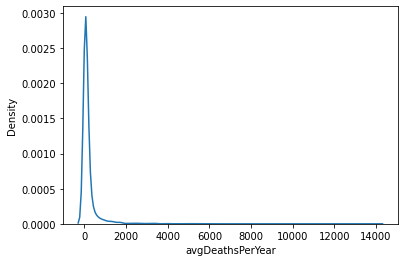

In [10]:
sns.kdeplot(data.avgDeathsPerYear)

Observation :

The next feature to be considered is "AvgHouseholdSize".

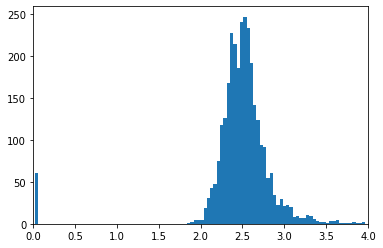

In [11]:
plt.hist(data.AvgHouseholdSize, bins=100)
plt.xlim(0, 4)
plt.show()

To get a better view, we change the limits of the x-axis.

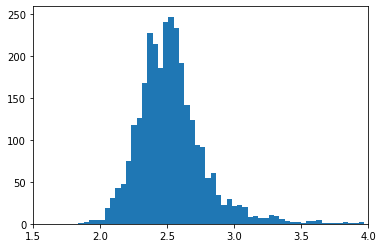

In [12]:
plt.hist(data.AvgHouseholdSize, bins=100)
plt.xlim(1.5, 4)
plt.show()

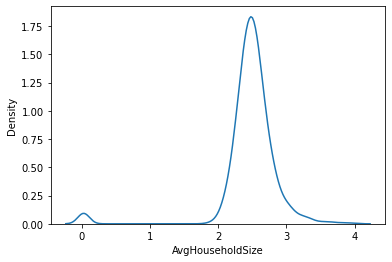

In [13]:
sns.kdeplot(data.AvgHouseholdSize)

Observation :

Let's have another look at the skewness values, and see if our numerical observations correspond to the plot.

In [14]:
data.skew()

TARGET_deathRate     0.274724
avgDeathsPerYear    11.949188
incidenceRate        0.771935
AvgHouseholdSize    -3.380988
BirthRate            1.323203
dtype: float64

Observation :

# Kurtosis

Kurtosis :

![Kurtosis](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcSELD7UKm7nrpgS5x2c9E1x6RlndFovKdjjgr54xAVosJQjjz0Y)

If kurtosis < 3, platykurtic. If kurtosis > 3, leptokurtic.

In [15]:
data.kurtosis()

TARGET_deathRate      1.354622
avgDeathsPerYear    242.659927
incidenceRate        16.796490
AvgHouseholdSize     19.373609
BirthRate             5.229389
dtype: float64

Observation :


# Subplots

We can also make figures in subplots.

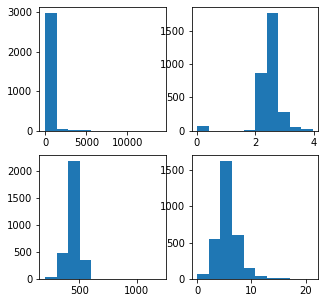

In [16]:
fig, axs = plt.subplots(2, 2, figsize=(5, 5))
axs[0, 0].hist(data.avgDeathsPerYear)
axs[1, 0].hist(data.incidenceRate)
axs[0, 1].hist(data.AvgHouseholdSize)
axs[1, 1].hist(data.BirthRate)

plt.show()

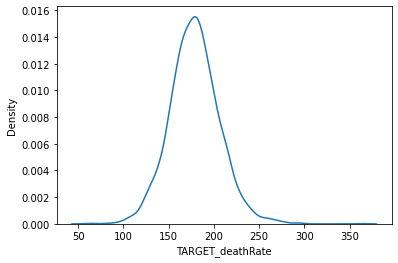

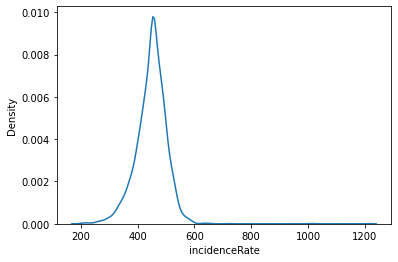

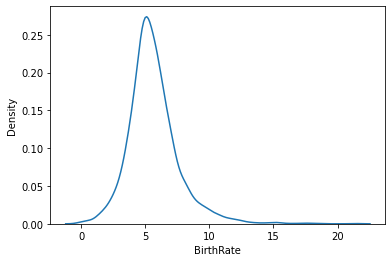

In [17]:
sns.kdeplot(data.TARGET_deathRate)
plt.show()
sns.kdeplot(data.incidenceRate)
plt.show()
sns.kdeplot(data.BirthRate)

# Heatmap

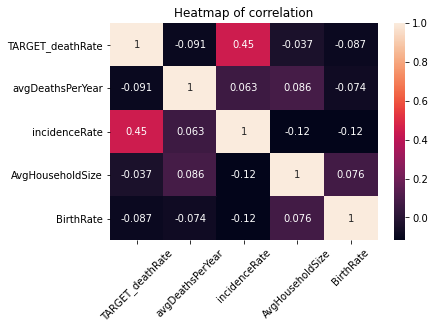

In [18]:
sns.heatmap(data.corr(), annot=True)
plt.xticks(rotation=45)
plt.title("Heatmap of correlation")
plt.show()

Observation :

# Pairplot

A way to visualize the distributions and the relationships in the dataframe all at once.

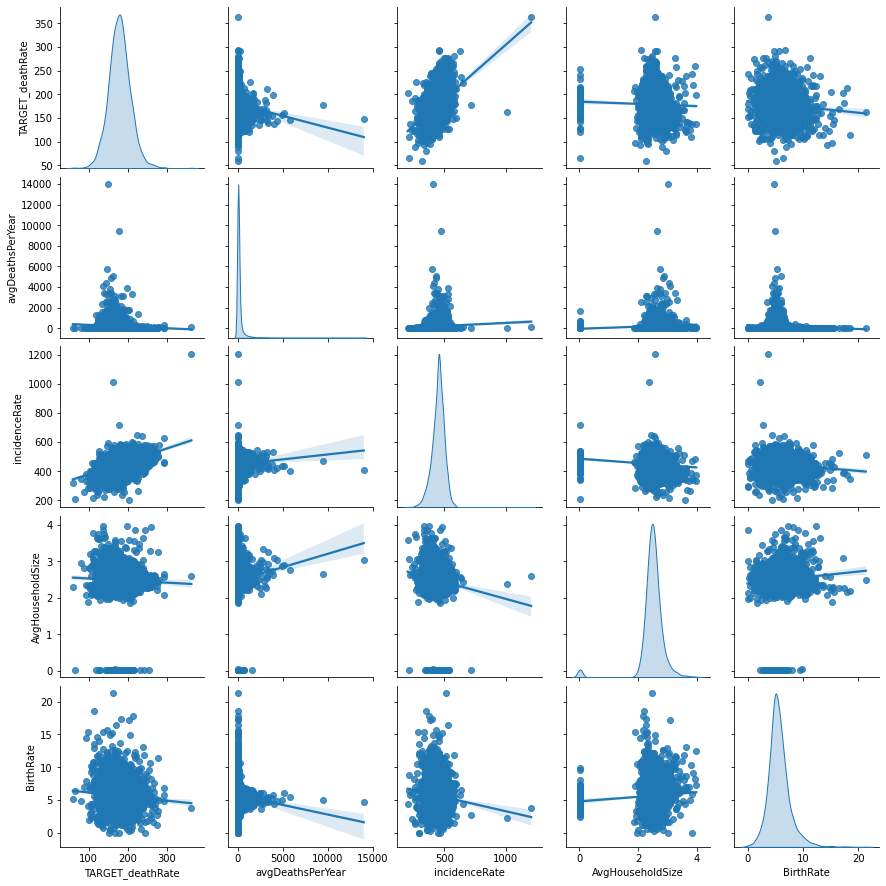

In [19]:
sns.pairplot(data, diag_kind='kde',kind='reg')

Observation :

# Boxplots

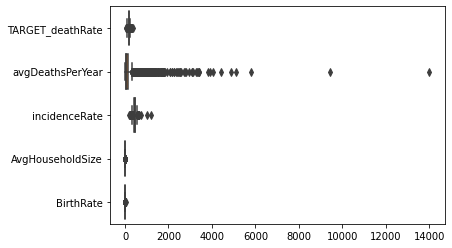

In [20]:
sns.boxplot(data=data, orient='h')

But this doesn't really help. So let's just take one at a time.

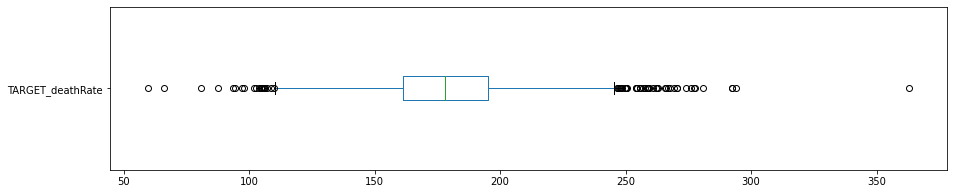

In [21]:
plt.figure(figsize=(15, 3))
data.boxplot("TARGET_deathRate", vert=0, grid=False)

Observation :

# Visualizations for categorical features

In [22]:
df.binnedInc.value_counts()

(45201, 48021.6]      306
[22640, 34218.1]      306
(54545.6, 61494.5]    306
(51046.4, 54545.6]    305
(48021.6, 51046.4]    305
(42724.4, 45201]      305
(34218.1, 37413.8]    304
(37413.8, 40362.7]    304
(40362.7, 42724.4]    304
(61494.5, 125635]     302
Name: binnedInc, dtype: int64

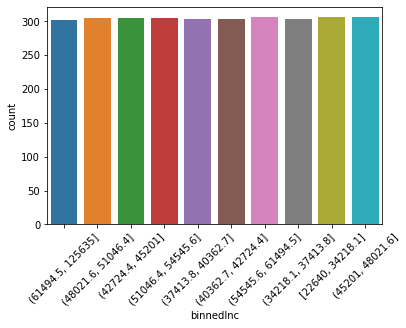

In [23]:
# A simple frequency diagram

sns.countplot(x="binnedInc", data=df)
plt.xticks(rotation=45)
plt.show()

This is a case of balanced categories, where the count of each class is similar.

Another fancy visualization for categories.

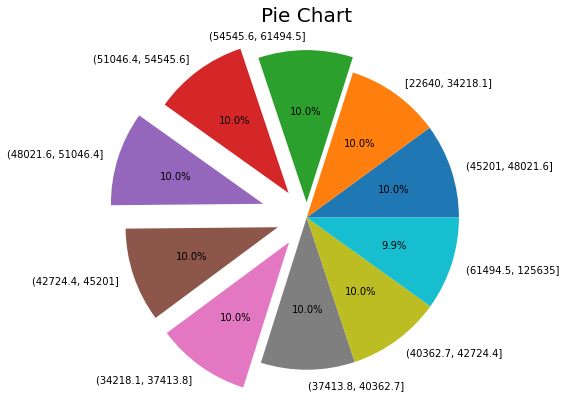

In [24]:
  labels=df['binnedInc'].value_counts().index
  explode=[0,0,0.1,0.2,0.3, 0.2, 0.2, 0, 0,0]
  values=df['binnedInc'].value_counts().values

  #visualization
  plt.figure(figsize=(7,7))
  plt.pie(values,explode=explode,labels=labels, autopct='%1.1f%%')
  plt.title('Pie Chart',color='black', fontsize=20)
  plt.show()